In [1]:
!git clone https://github.com/tkim104/Neural_Signals_and_Computation_tkim104_GitHUBHW2.git

Cloning into 'Neural_Signals_and_Computation_tkim104_GitHUBHW2'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 1.51 MiB | 13.65 MiB/s, done.


In [2]:
import os
os.chdir('Neural_Signals_and_Computation_tkim104_GitHUBHW2')

In [ ]:
# Note:
# Some files may use the mount drive to get access to the data as follows

# Find the tif file in google drive

# drive.mount('/content/drive')
#file = "/content/drive/MyDrive/Neural_Signals_and_Computation_HW2/sample_dat.mat"

# or

# drive.mount('/content/drive')
#file = "/content/drive/MyDrive/Neural_Signals_and_Computation_HW2/exampleData.mat"

# Problem 1: Importance of likelihood selection.
Consider an experimental setup where we can present an N-dimensional stimulus x ∈ RN that elicits a response in a recorded neural population. For one of these neurons, assume that we measure a response r(x) for a neuron with a tuning curve g that is defined as the number of spikes in 1 s after the presentation of the stimulus. A common model for the response distribution of this neuron is the Poisson model where the response r is distributed as P(r|x) = Poisson(e^⟨g,x⟩) where ⟨g,x⟩ denotes the inner product between two vectors.

##Part A
Write MATLAB code that generates samples from this distribution. As a baseline, con-sider the tuning curve given by

g = gausswin(N,5).*(cos(2*pi*(0:(N-1))/10).’);

and sample stimuli given by

X = 2*rand(N,1);

Plot the distribution of r for a single draw of x as a histogram (i.e., generate a single random vector x and use this to draw multiple samples of r|x to generate the histogram). Try the same with drawing different x repeatedly.

Hint: Recall the properties of a Poisson distribution: the mean and the variance are the same(λ), and this value λ is used to calculate the values that comprise the probability mass function (PMF): P(r = k) = λke^(−λ) / k!

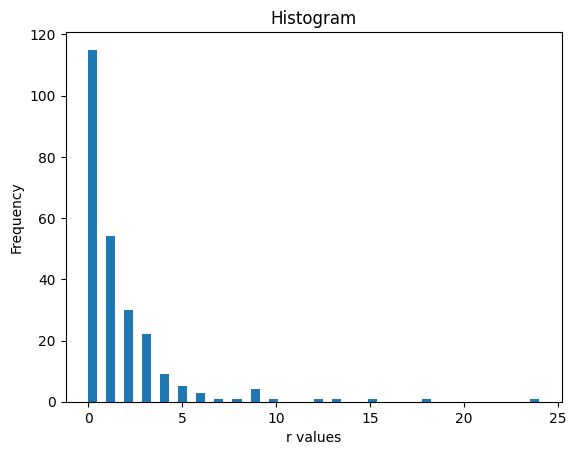

In [3]:
%run tkim104_problem_1_ex_1.ipynb

# Problem 1: Importance of likelihood selection.
Consider an experimental setup where we can present an N-dimensional stimulus x ∈ RN that elicits a response in a recorded neural population. For one of these neurons, assume that we measure a response r(x) for a neuron with a tuning curve g that is defined as the number of spikes in 1 s after the presentation of the stimulus. A common model for the response distribution of this neuron is the Poisson model where the response r is distributed as P(r|x) = Poisson(e^⟨g,x⟩) where ⟨g,x⟩ denotes the inner product between two vectors.

#Part B
Now generate a single response draw for each of M different stimuli xm, m = 1,...,M, where M should be a parameter in your code that is easily adjustable. The response vector should now be an M dimensional vector r ∈RM with a corresponding matrix X = [x1,...,xM] containing all of your generated stimuli. Often in higher dimensional settings we linearize models, in this 1 case assuming that r ≈ Xg with added independent, identically distributed (i.i.d.) Gaussian noise. Set up a probabilistic relationship (likelihood) of r conditioned on g under a Gaussian noise assumption. Specifically, assume that r = Xg + ε where ε is a mean-zero, Gaussian noise vector with variance σ2I. Use the likelihood derived to set up a maximum likelihood inference of g given the responses and stimuli (hint: think least-squares). How close is the estimate of g to the real g?

Distance between estimated g and real g: 0.8240160421072241


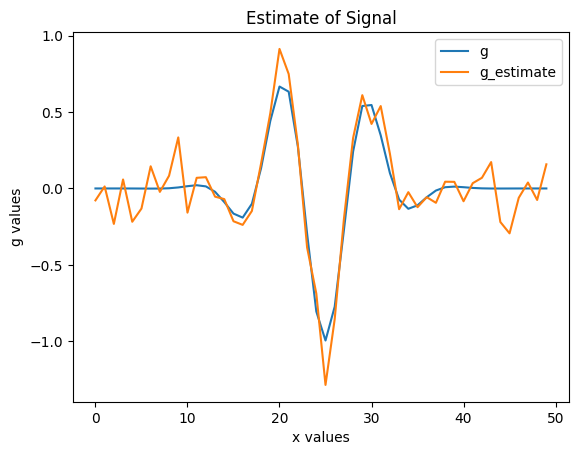

In [4]:
%run tkim104_problem_1_ex_2.ipynb

# Problem 1: Importance of likelihood selection.
Consider an experimental setup where we can present an N-dimensional stimulus x ∈ RN that elicits a response in a recorded neural population. For one of these neurons, assume that we measure a response r(x) for a neuron with a tuning curve g that is defined as the number of spikes in 1 s after the presentation of the stimulus. A common model for the response distribution of this neuron is the Poisson model where the response r is distributed as P(r|x) = Poisson(e^⟨g,x⟩) where ⟨g,x⟩ denotes the inner product between two vectors.

##Part C
Now use the actual known likelihood (in this case) to estimate g by setting up an optimization program using likelihood defined above. You should focus on defining the minimization program and then using the fminunc function in MATLAB.
Infer the tuning curve using M = N samples. How accurate are the curves? What about for M = 2N? M = N/2? Plot the estimates from Part C and Part B together. What do you notice about the estimates as the number of samples gets large?

For M: 100
For N: 100


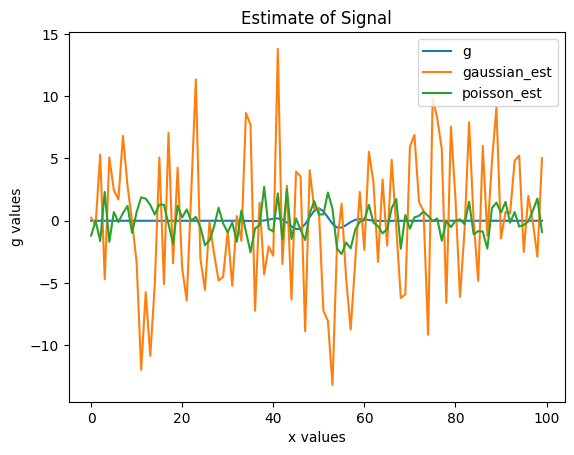

For M: 200
For N: 100


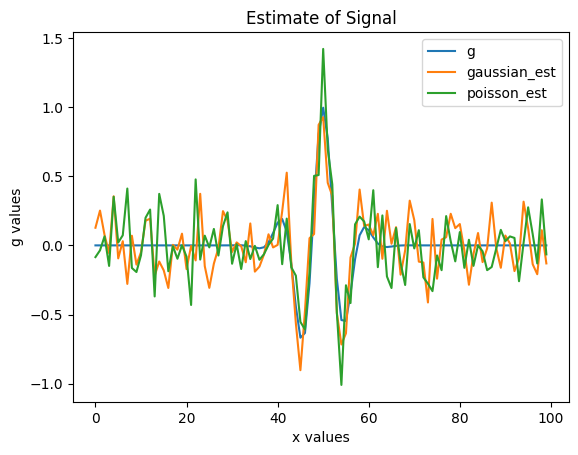

For M: 50
For N: 100


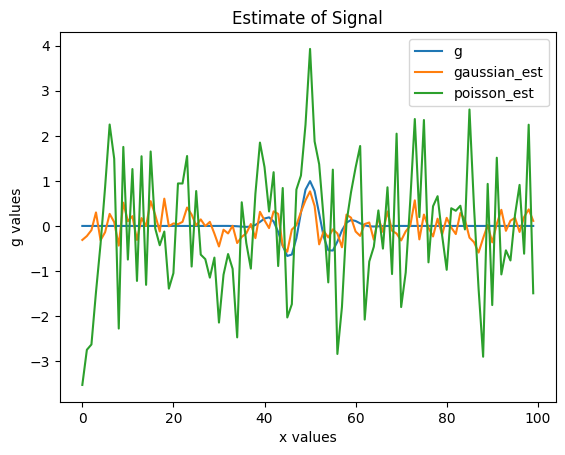

In [5]:
%run tkim104_problem_1_ex_3.ipynb

As the number of samples get larger, both the gaussian and poisson cases seem to be better able to estimate the true g signal. Having the number of features and samples equal makes the gaussian case wildly inaccurate while decreasing the number of samples relative the number of features appear to make the poisson estimate wildly inaccurate.

# Problem 1: Importance of likelihood selection.
Consider an experimental setup where we can present an N-dimensional stimulus x ∈ RN that elicits a response in a recorded neural population. For one of these neurons, assume that we measure a response r(x) for a neuron with a tuning curve g that is defined as the number of spikes in 1 s after the presentation of the stimulus. A common model for the response distribution of this neuron is the Poisson model where the response r is distributed as P(r|x) = Poisson(e^⟨g,x⟩) where ⟨g,x⟩ denotes the inner product between two vectors.

##Part D
Adding in priors: Now let’s add some prior knowledge about the tuning curve. For the Gaussian case, add a Gaussian prior p(g) ∼ N(0,σ2I). Recall that with priors we change from a maximum likelihood to a maximum a-posteriori (MAP) estimation. Use the definition of the MAP estimate and Bayes rule to derive the estimator. How does this change the optimization? How about the estimated tuning curve? For the Poisson case, add a “smoothing” term p(∇g) ∼N(0,σ2I) (following the same procedure). How does this affect the optimization? How about the estimated tuning curve?

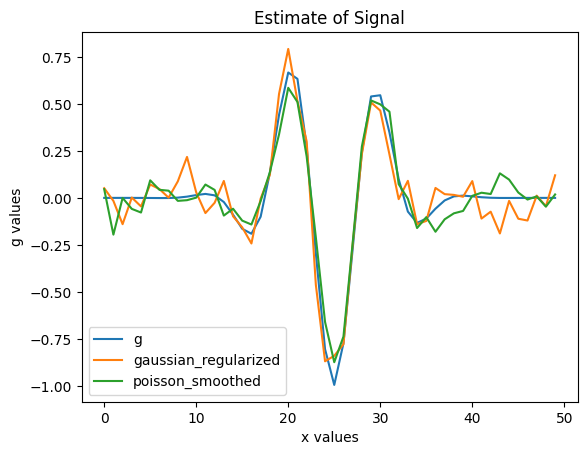

In [6]:
%run tkim104_problem_1_ex_4.ipynb

Adding the prior to the gaussian estimate (by assuming a gaussian prior) essentially adds a regularization term to solving the loss function between the estimate the gaussian g and the real g based on the data. The tuning curve thus gets regularized to avoid large changes in variance and matching too well with the data points given. On the other hand, adding a smoothing term to the poisson case changes the optimization by adding a penalty parameter that reflects the poorly if the difference between values in the poisson estimate are too different from each other. Overall, the tunning curve is thus smoother and less jagged.

# Problem 1: Importance of likelihood selection.
Consider an experimental setup where we can present an N-dimensional stimulus x ∈ RN that elicits a response in a recorded neural population. For one of these neurons, assume that we measure a response r(x) for a neuron with a tuning curve g that is defined as the number of spikes in 1 s after the presentation of the stimulus. A common model for the response distribution of this neuron is the Poisson model where the response r is distributed as P(r|x) = Poisson(e^⟨g,x⟩) where ⟨g,x⟩ denotes the inner product between two vectors.

##Part E Parameter regimes:
Finally you should have code that generates a number of samples M
that probe an N dimensional receptive field. You should be able to change these parameters as well as the stimulus strength A (multiplier of X) as well as the level of regularization (i.e., the variance of the prior σ). Vary these parameters. What happens at low signal levels? How many samples do you need if A = 0.01? Compare these observations with the histograms of the spike counts

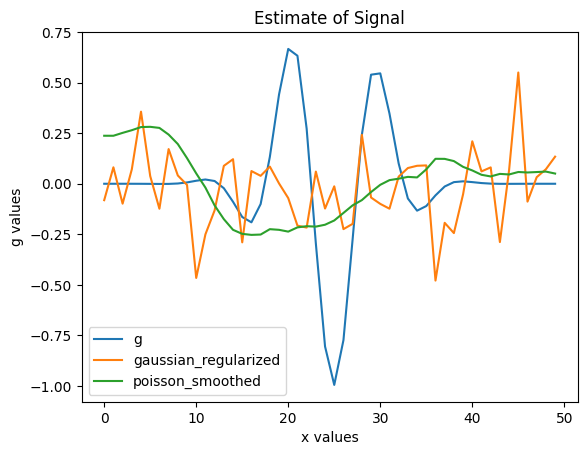

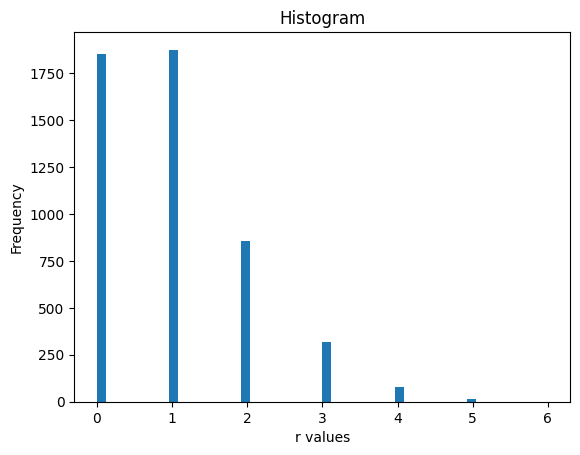

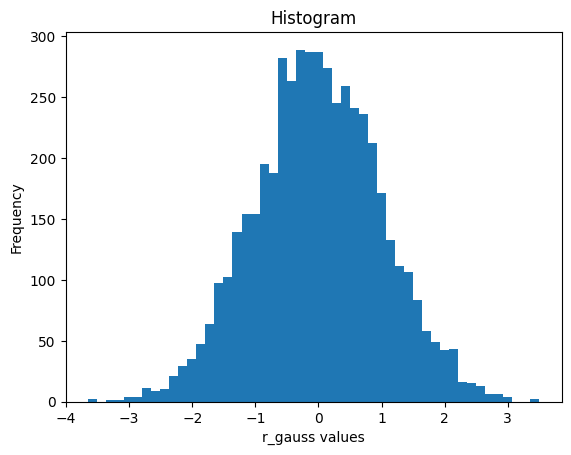

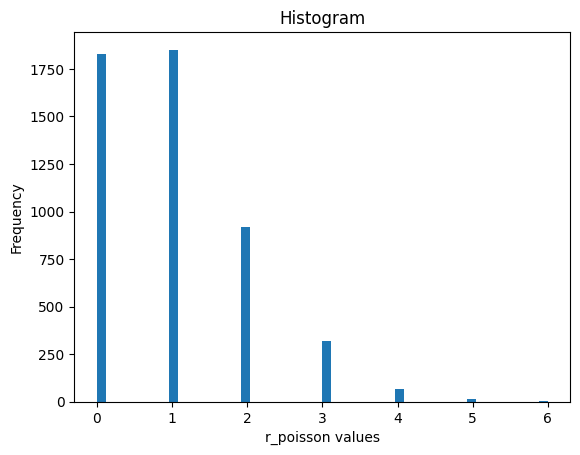

In [7]:
%run tkim104_problem_1_ex_5.ipynb

At low signal levels the estimates have a hard time figureing out the tuning curve of the original g values. Such low levels of A = 0.01 require the estimates to have several thousand samples to begin taking shape, let alone matching the shape of the tuning function. Overall, when we compare the histograms of the spike counts for certain values, the still tend to match the expected values of r in distribution and frequency in general, excluding the gaussian where the positive half matches well, ignore the negative half.

#Problem 2: Dimensionality reduction
Consider a dataset where M neurons are recorded during repeated trials of a reach task. The resulting data is a number of matrices (one per trial) that is N ×T (number of neurons by time - in 1 ms bins) where Xit represents the number of spikes for neuron i during the time-bin t. This problem will consider the dimensionality reduction approach of finding the underlying patterns of neural activity common across trials. Specifically we will first look at standard PCA before and after processing (to highlight the benefit of priors over spike-rates). We will then look at applying an external package that finds smooth spike-rates underlying the neural activity automatically (Gaussian Process Factor Analysis).

##Part A
Load the data from sample dat.mat. Compute the peristimulus time histogram (PSTH) of the data. Plot the PSTHs and note any trends. Now pre-process the data by using a Gaussian Process (GP) prior to smooth the data. A GP prior smooths the data by creating a correlation structure that makes nearby points in time have similar values. Specifically, if we treat each neuron’s PSTH as xn, which is a T-dimensional vector, the prior distribution is xn ∼ N(0,K),
where the covariance matrix K is defined as Kij = A ∗e−(ti−tj)2/l. Use the same approach as Problem 1 to get an estimate of the smoothed PSTH per neuron. Compare the two sets of PSTHs visually and remark on any details you notice. TIP: This computation might take a minute to run depending on your computer. Test on one neuron first before running on all the neurons (this is a good habit to get into with computational work regardless!)

Mounted at /content/drive


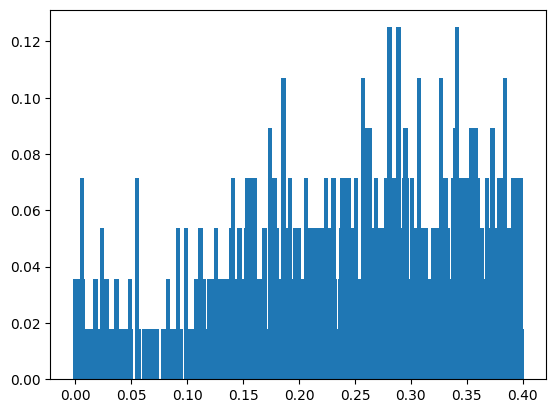

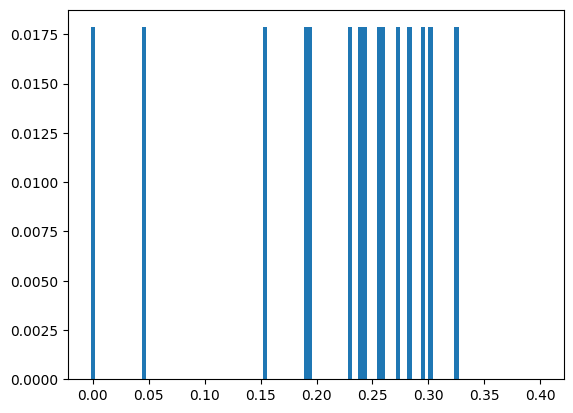

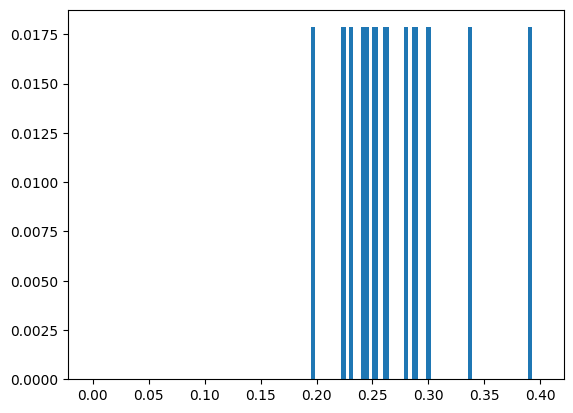

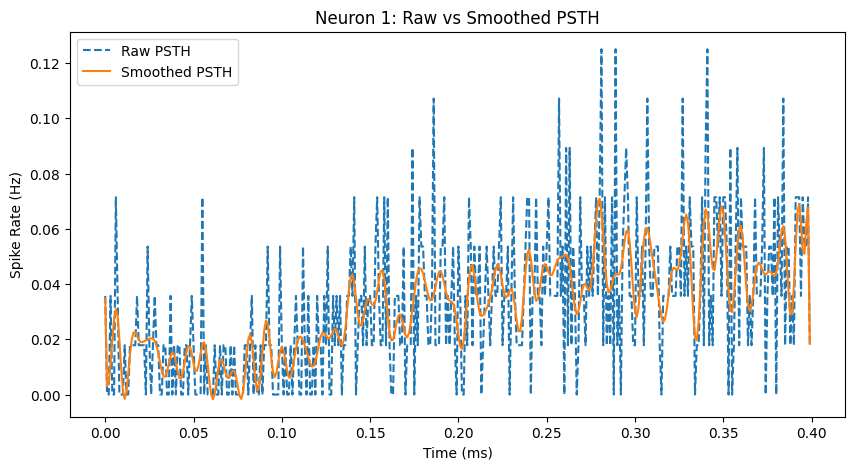

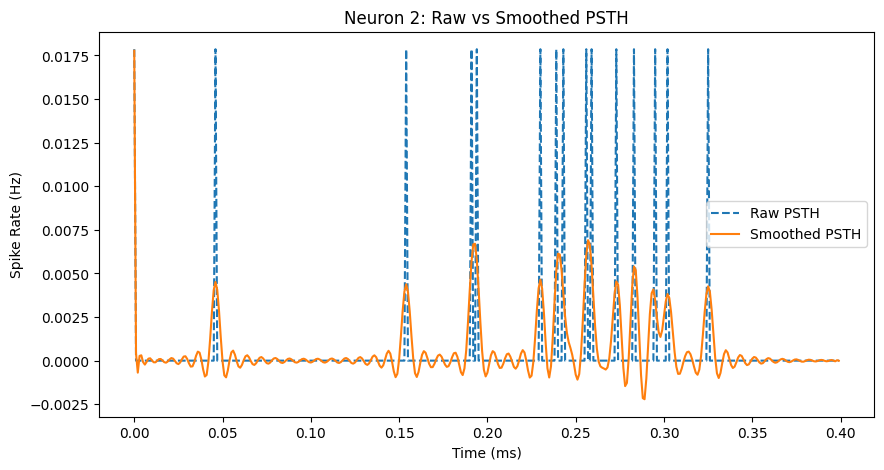

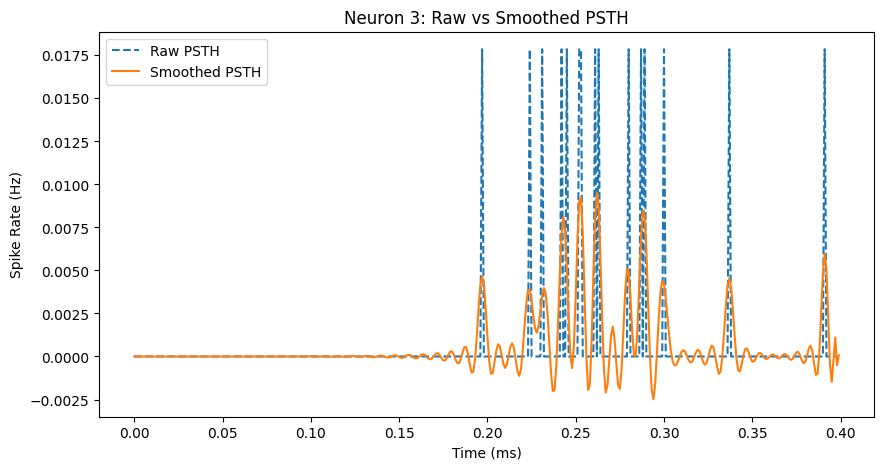

In [8]:
%run tkim104_problem_2_ex_1.ipynb

When plotting the raw PSTHs, it appears that in every case, except for the first neuron, that the firing rates are distributed quite discretely with certain levels of firing at specific times rather than firing continously over time. It could indicate that some neurons fired at specific intervals responding to a certain stimulus or other reaction.

In terms of the raw and smoothed PSTHs, they tend to follow the same overall shape and pattern, with the sharp points of higher spike rate correlating to high hills / spikes in the smoothed case, but the smoothed case has a sort of ringing or 'bounce down' before attentuating the jump to 0 and even goes into the negative slightly after smoothing in some sections.

#Problem 2: Dimensionality reduction
Consider a dataset where M neurons are recorded during repeated trials of a reach task. The resulting data is a number of matrices (one per trial) that is N ×T (number of neurons by time - in 1 ms bins) where Xit represents the number of spikes for neuron i during the time-bin t. This problem will consider the dimensionality reduction approach of finding the underlying patterns of neural activity common across trials. Specifically we will first look at standard PCA before and after processing (to highlight the benefit of priors over spike-rates). We will then look at applying an external package that finds smooth spike-rates underlying the neural activity automatically (Gaussian Process Factor Analysis).

##Part B
Compute the Principal components of the PSTH matrix, both with and without smoothing. Look at the temporal principal components. Specifically, plot (side-by-side) the top 3 components as a 3D line plot. What do you notice?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


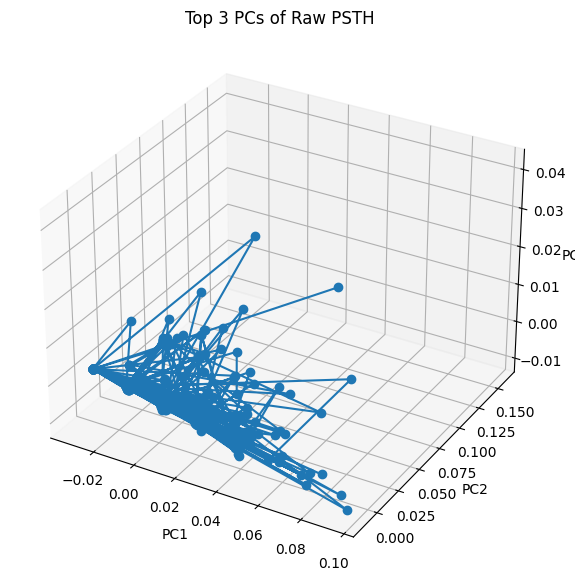

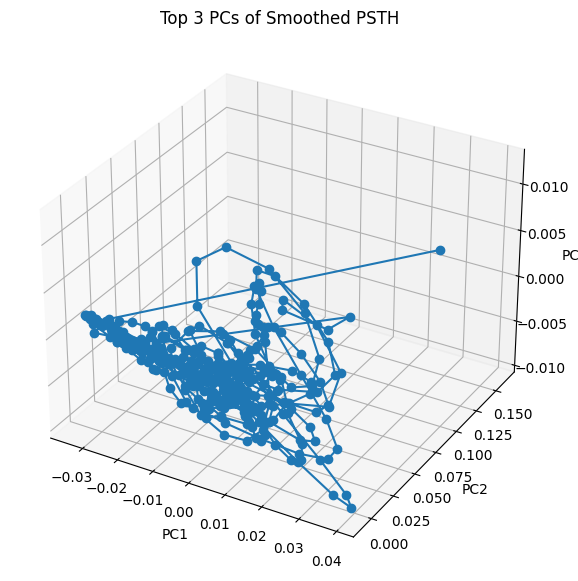

In [9]:
%run tkim104_problem_2_ex_2.ipynb

It appears that the smoothed version of the PCA with the PSTH has some swirling pattern when we plot the 3 principal components as a 3d line plot while the same can not be said for the raw version.

#Problem 2: Dimensionality reduction
Consider a dataset where M neurons are recorded during repeated trials of a reach task. The resulting data is a number of matrices (one per trial) that is N ×T (number of neurons by time - in 1 ms bins) where Xit represents the number of spikes for neuron i during the time-bin t. This problem will consider the dimensionality reduction approach of finding the underlying patterns of neural activity common across trials. Specifically we will first look at standard PCA before and after processing (to highlight the benefit of priors over spike-rates). We will then look at applying an external package that finds smooth spike-rates underlying the neural activity automatically (Gaussian Process Factor Analysis).

#Part C
Look in the GPFA folder. Identify how to run GPFA by looking at the demo files
included. Run GPFA on the data with a bin-size of 1ms (instead of the default 20ms). GPFA returs per-trial representations of neural activity. Use the function provided in the gpfa code directory plot3D to plot the time-courses for all of the trials. What do you notice?

In [ ]:
# TODO
%run tkim104_problem_2_ex_3.ipynb

#Problem 2: Dimensionality reduction
Consider a dataset where M neurons are recorded during repeated trials of a reach task. The resulting data is a number of matrices (one per trial) that is N ×T (number of neurons by time - in 1 ms bins) where Xit represents the number of spikes for neuron i during the time-bin t. This problem will consider the dimensionality reduction approach of finding the underlying patterns of neural activity common across trials. Specifically we will first look at standard PCA before and after processing (to highlight the benefit of priors over spike-rates). We will then look at applying an external package that finds smooth spike-rates underlying the neural activity automatically (Gaussian Process Factor Analysis).

#Part D
Given trial-by-trial variability, what do you think could be reasonable explanations for the observed deviations of the low-dimensional neural trajectory. Pick one of these hypotheses and describe a theoretical way to test a prediction made by that hypothesis.

In [ ]:
# TODO
%run tkim104_problem_2_ex_4.ipynb

#Problem 3: Learning a data-driven Linear Dynamical System (LDS)

##Part A:
Find the data associated with the jPCA paper (included as exampleData.mat). Load up the data, and read the NOTES.pdf file to identify which data matrix corresponds to “condition 27”. What do the values in this matrix represent? Plot the data as a heatmap.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


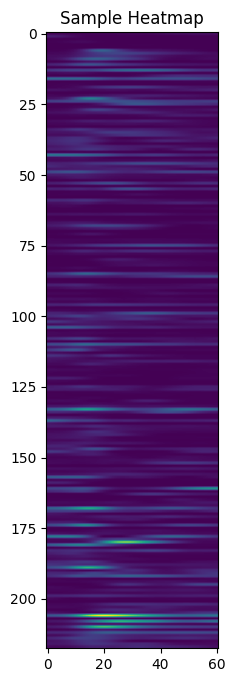

In [10]:
%run tkim104_problem_3_ex_1.ipynb

Looking through the data matrices, we can find condition 27 as the 27th row of the data struct as a pair of data groups; A matrix, and time. The A matrix represents the mean firing rate at a certain time t (matched in the time field) for 218 neurons measured for that condition.

#Problem 3: Learning a data-driven Linear Dynamical System (LDS)

##Part B:
In this problem we will set up the optimization to learn a linear system guiding a population of neurons. For one dataset write out the probabilistic model corresponding to the discrete approximation of dxt/dt = Axt + ε where ε is independently identically distributed Gaussian noise with zero mean and standard deviation σ2I. For the discretization, use the simple approximation to the differential: dxt/dt ≈ (xt − xt−1)/dt. Now what is the same solution
when given k datasets that all follow the same dynamics? (Hint: think about each dataset as independent: what’s an important property of independent random variables with respect to their probabilities?). The derived likelihood represents P(x|A). Use this to set up a ML estimate of A. Code up in MATLAB the solution you derived and run on the jPCA dataset. Reconstruct the data by taking each xt and predicting xt+1 by taking one step given the dynamical system
you found (via the discrete equation you derived above). Compute the reconstruction error of the data (norm of the difference between the estimated xt+1 and the real xt+1), and plot the histogram of these errors across all time-points.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


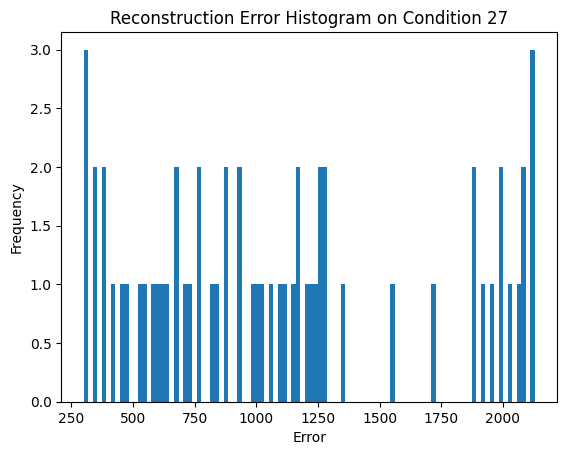

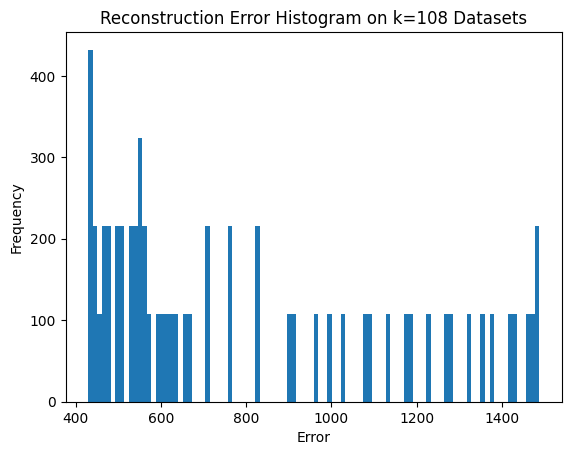

In [11]:
%run tkim104_problem_3_ex_2.ipynb

#Problem 3: Learning a data-driven Linear Dynamical System (LDS)

##Part C:
Repeat part B but consider only the top 6 principal components of each matrix X.
REMEMBER: PCA projection includes a mean subtraction step! This is very important in projecting the data! Compute again the reconstruction error of the data given the learned dynamical system (with a one-step prediction), and plot the histogram of errors.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


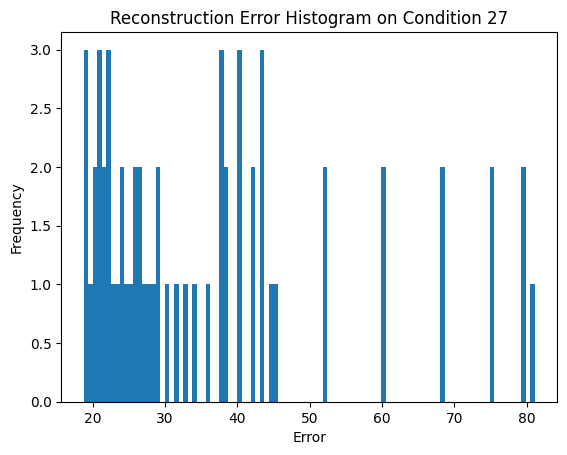

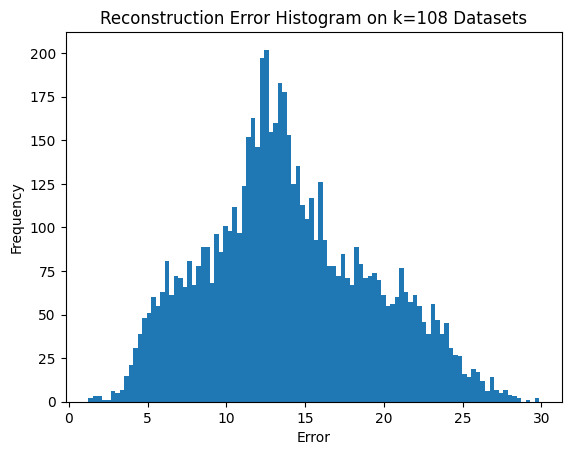

In [12]:
%run tkim104_problem_3_ex_3.ipynb

#Problem 3: Learning a data-driven Linear Dynamical System (LDS)

##Part D:
The learned dynamics should provide a projection of the data onto a given space. Take one of the first 6 datapoints in each dataset in the jPCA datasets, and use the learned dynamics from Part C to extrapolate the neural system forward in time. Plot the first two dynamical principal dimensions of the projection: how do they look?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


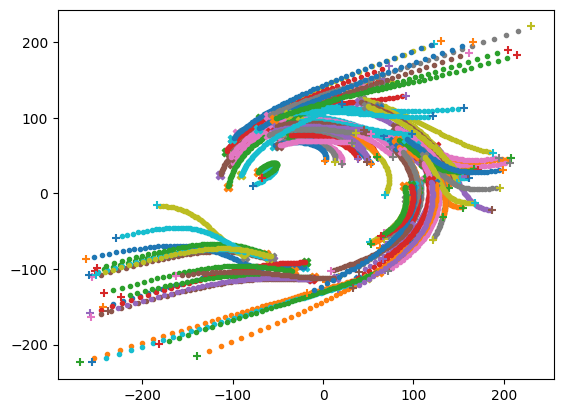

In [13]:
%run tkim104_problem_3_ex_4.ipynb

Plotting the first two principal components, we can see a spiral pattern as shown before in the notes/paper for jPCA with the beginning of the spiral starting in the centerish and going out in a rotation.

#Problem 3: Learning a data-driven Linear Dynamical System (LDS)

##Part E:
Now run the jPCA algorithm on the same data. Look at the code and notes provided
by the authors and find the right lines of code to run on the dataset. Find the learned dynamics and project the data forward as with Part D. Use “subplot” to plot the projected neural activity next to each other. What key differences do you see between the dynamics? What differences between the dynamical system matrices do you see? Are there similarities or differences e.g., in the eigenspectra?

Cloning into 'jPCA'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 127 (delta 68), reused 91 (delta 36), pack-reused 0
Receiving objects: 100% (127/127), 770.10 KiB | 15.10 MiB/s, done.
Resolving deltas: 100% (68/68), done.
Processing /content/Neural_Signals_and_Computation_tkim104_GitHUBHW2/jPCA
  Preparing metadata (setup.py) ... done
  Created wheel for jPCA: filename=jPCA-0.0.1-py3-none-any.whl size=8663 sha256=332ecd9b852996e5c42c340ca4905b1a26b459e4ba348150378b80cb90b41845
  Stored in directory: /tmp/pip-ephem-wheel-cache-oioiie5u/wheels/79/e0/82/6222793f04c57c7bfaa6732a942be917f809f19537138cc39b
Successfully built jPCA
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


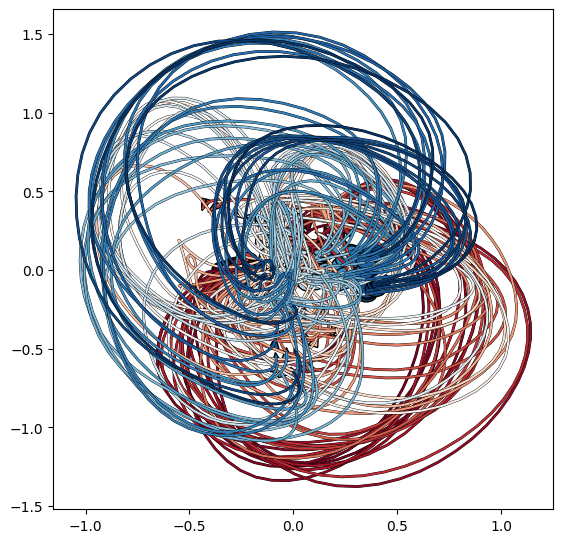

In [14]:
%run tkim104_problem_3_ex_5.ipynb

The initial start of both Part D and Part E are quite similar, where they represent the rotational aspect of jPCA, however in their case for their implementation, they are representing the data further in time and showing the full dynamics forward in the principal component space. Their full matrices are similar to the values we arrived to, using the same for PCA, but they instead use utility functions with regressions to solve for the rest of the case. Overall, some other key differences are the tighter rotations and color changes in their representation of the data compared to what was found in Part D.